

# **Entropía como medida de la Diversidad**

La entropía es una medida del aumento de estados de un sistema o el aumento de la incertidumbre de un sistema.  
Matemáticamente, entropía es:  

\begin{align}
        \mathbf{S} = -\sum_{i=1}^n\mathbf{p_i} \cdot \mathbf{log_2(p_i)}
    \end{align}

donde $\mathbf{p_i}$ es la probabilidad de que el sistema se encuentre en el estado $i$.

Vamos a usar la entropía como una medida de la diversidad de estados en los que puede estar un sistema en dos situaciones distintas:
* Para medir el aumento en la diversidad de nombres de recién nacidos en EEUU a partir de 1880
* Para medir el aumento de la diversidad de estados en los que puede evolucionar el sistema dinámico conocido como mapa logístico.

## Diversidad de nombres de Bebés  

La Administración de Seguridad Social de EEUU (SSA por sus siglas en inglés) ha disponibilizado los datos de frecuencia de nombres de bebés desde 1880 hasta el 2019. La SSA facilita estos datos guardados por año, número de nacimientos, sexo/nombre. Estos archivos pueden obtenerse aquí

http://www.ssa.gov/oact/babynames/limits.html

Usaremos la entropía como medida del aumento en la diversidad de nombres de niños y niñas en EEUU a partir de 1880. 


In [1]:
# con este se accede a los archivos contenidos en el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Imports Básicos
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# El path para acceder al directorio donde están los datos.
names_path = '/content/drive/MyDrive/names'

In [4]:
# loop para concatenar los nombres de todos los años en un sólo DataFrame
anhos = range(1880, 2020)
columns = ['nombre', 'sexo', 'nacimientos']
pieces = []

for anho in anhos:
  ruta = names_path + '/yob' + str(int(anho)) + '.txt' 
  
  frame = pd.read_csv(ruta, names=columns)

  frame['anho'] = anho
  pieces.append(frame)

  # concatenar todo
  nombres = pd.concat(pieces, ignore_index=True)

In [5]:
nombres.head()

,nombre,sexo,nacimientos,anho
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [6]:
# Localizando los datos nulos
nombres.isnull().sum()

nombre         0
sexo           0
nacimientos    0
anho           0
dtype: int64

In [7]:
# Creamos una función que calcula qué proporción, del total anual, representa cada nombre.
def prop(grupo):
  nacimientos = grupo.nacimientos.astype(float)

  grupo['prop'] = nacimientos/nacimientos.sum()
  return grupo

In [8]:
# aplicamos la función al dataframe
nombres = nombres.groupby(['anho', 'sexo']).apply(prop)

In [9]:
nombres.head()

,nombre,sexo,nacimientos,anho,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Así por ejemplo, en el año 1880 nacieron 7065 bebés de sexo femenino a quienes les dieron el nombre Mary, lo que equivale al 7.764% del total de niñas nacidas ese año.

In [10]:
# Localizando nuevamente datos nulos
nombres.isnull().sum()

nombre         0
sexo           0
nacimientos    0
anho           0
prop           0
dtype: int64

In [11]:
# Función para calcular la entropía

def entropy(proba):
    lista = []
    for k in proba:
        if k == 0:
            s = 0
        else:
            s = -np.log2(k)*k
        lista.append(s) 
    return np.array(lista).sum()



In [12]:
# Creamos un dataframe con los valores de la entropía por año 
# Una columna Femenina y otra Masculina
diversidad = pd.DataFrame()
entropia_F = []
entropia_M = []
mujeres = nombres[nombres.sexo == 'F']
hombres = nombres[nombres.sexo == 'M']

for anho in anhos:
  prob_mu = mujeres[mujeres['anho']==anho][['nombre', 'prop']]
  prob_ho = hombres[hombres['anho']==anho][['nombre', 'prop']]
  entropia_F.append(entropy(prob_mu.prop))
  entropia_M.append(entropy(prob_ho.prop))

diversidad['femenina'] = entropia_F
diversidad['masculina'] = entropia_M
diversidad['anho'] = anhos

In [13]:
diversidad.head()

,femenina,masculina,anho
0,7.591849,6.885242,1880
1,7.599520,6.887269,1881
2,7.638406,6.972321,1882
3,7.678674,6.952008,1883
4,7.733801,7.048149,1884


In [14]:
# colocamos el año como índice 
diversidad = diversidad.set_index('anho')

In [15]:
diversidad.head()

,femenina,masculina
anho,,
1880,7.591849,6.885242
1881,7.599520,6.887269
1882,7.638406,6.972321
1883,7.678674,6.952008
1884,7.733801,7.048149


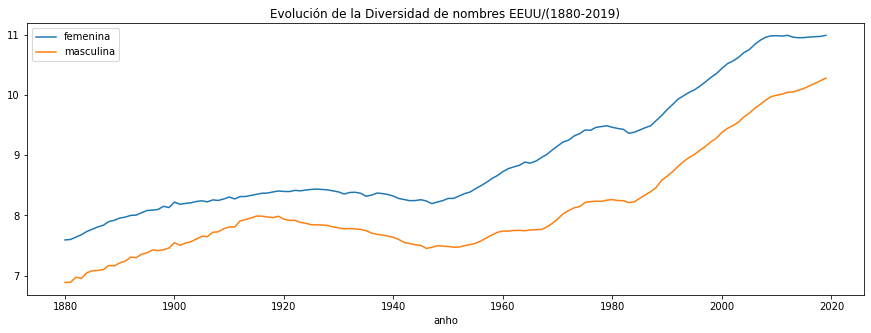

In [16]:
# Graficamos diversidad en función del tiempo

diversidad.plot(title='Evolución de la Diversidad de nombres EEUU/(1880-2019)',figsize=(15,5))
plt.show()

Del gráfico se concluye que los padres son más conservadores con los varones a la hora de elegir un nombre.

## Mapa Logístico

Vamos a calcular el aumento de la diversidad de estados del mapa logístico. Un modelo sencillo para quienes están comenzando a estudiar sistemas dinámicos y caos. 

\begin{align}
        \mathbf{x}_{n+1} = \mu\cdot\mathbf{x_n}\cdot(1-\mathbf{x_n})
    \end{align}

Recordemos que el parámetro $\mu$ puede tomar valores entre 0 y 4, y que la variable x entre 0 y 1.

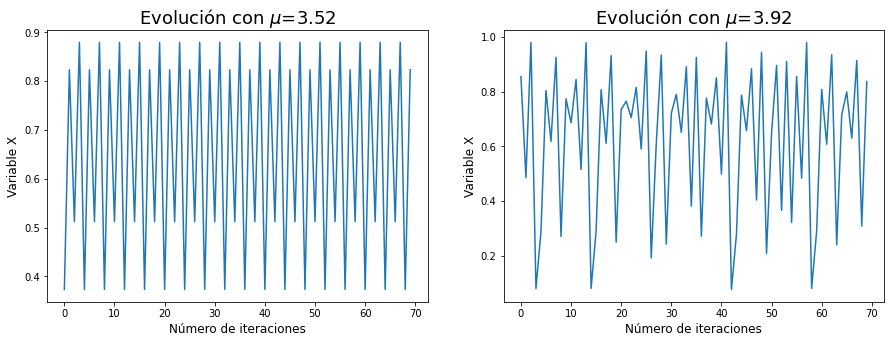

In [17]:
# mapa logístico
x = [0.1]
m = 3.52

for k in range(0,300):
 
  x.append(m*x[k]*(1-x[k]))

# segundo mapa logístico
x1 = [0.1]
m1 = 3.92

for k in range(0,300):
 
  x1.append(m1*x1[k]*(1-x1[k]))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(x[-70:])
plt.grid('on', which='minor', axis='x' )
plt.title('Evolución con $\mu$=3.52', fontsize=18)
plt.xlabel('Número de iteraciones', fontsize=12)
plt.ylabel('Variable X', fontsize=12)
plt.subplot(1,2,2)
plt.plot(x1[-70:])
plt.title('Evolución con $\mu$=3.92', fontsize=18)
plt.xlabel('Número de iteraciones', fontsize=12)
plt.ylabel('Variable X', fontsize=12)
plt.show()



Dependiendo del valor que tome el parámetro $\mu$ el sistema puede tener un comportamiento regular o caótico. El comportamiento regular (o peródico) se caracteriza por tener pocos estados que se repiten uno tras otro; en cambio, el comportamiento caótico se caracteriza por tener un número infinito de posibles estados.

Un excelente gráfico para observar la transición desde comportamiento regular al caos es el diagrama de biburcación. En él se observa claramente cómo los valores que toma el parámetro $\mu$ entre [0, 4] cambia el comportamiento del sistema. Veámoslo a continuación.

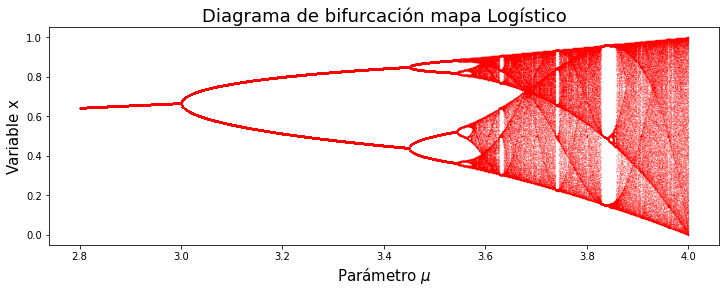

In [55]:
# Rutina para calcular y graficar el diagrama de bifurcación del mapa logístico

f=lambda a,x: a*x*(1-x)
A=[]
X=[]
x=0.2

# Loop para crear la variable
# haremos que el parámetro se mueva entre 2.8 y 4, con un incremento de 0.001

for a in np.arange(2.8, 4, 0.001):
  for k in range(1000):
    x=f(a,x)


  # una vez que se estabiliza la órbita

  for k in range(500):
    x=f(a,x)
    A.append(a)
    X.append(x)

# Para graficar
plt.figure(figsize=(12,4))
plt.plot(A,X,'r.', markersize=0.1)
plt.xlabel('Parámetro $\mu$', fontsize=15)
plt.ylabel('Variable x',fontsize=15)
plt.title('Diagrama de bifurcación mapa Logístico', fontsize=18)
plt.savefig('/content/drive/MyDrive/names/bifurcacion.png')
plt.show()

### Cálculo entropía
 







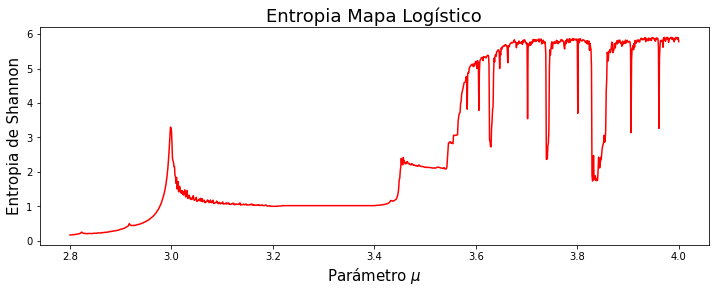

In [54]:
# Rutina para calcular la entropía
A=[]
E = []

plt.figure(figsize=(12, 4))
for mu in np.arange(2.8, 4, 0.001):
  x = [0.8]
  A.append(mu)
  for k in range(1100):
    
    x.append(mu*x[k]*(1-x[k]))
  
  #X = x[:]
  histo = np.histogram(x, 70)
  prob = histo[0]/histo[0].sum()
  E.append(entropy(prob))
plt.plot(A, E, 'r-', markersize=2)
plt.title('Entropia Mapa Logístico', fontsize=18)
plt.xlabel('Parámetro $\mu$', fontsize=15)
plt.ylabel('Entropia de Shannon', fontsize=15)
plt.savefig('/content/drive/MyDrive/names/entropia.png')
plt.show()


Vamos a poner estos gráficos juntos


In [56]:
import cv2
entropia = cv2.imread('/content/drive/MyDrive/names/entropia.png')
bifurcacion = cv2.imread('/content/drive/MyDrive/names/bifurcacion.png')

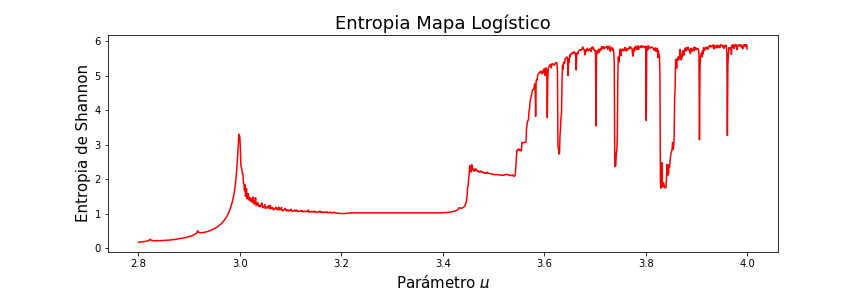

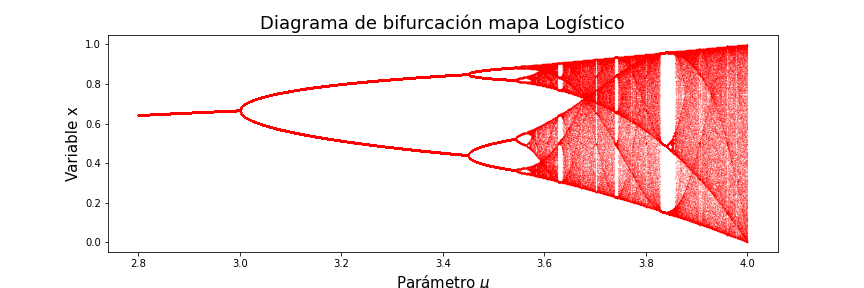

In [57]:
# Gáfico conjunto
cv2_imshow(entropia)
cv2_imshow(bifurcacion)
plt.show()

La entropía aumenta cada vez que ocurre una bifurcación de órbitas, es decir, cuando aumenta la diversidad, y se reduce en las ventanas de orden dentro de diagrama de bifurcación.


Queda para un notebook posterior estudiar la relación entre el tamaño del bin, con los que se calcula la distribución de probabilidades, y la entropía. A proiri se puede establecer que, para una serie de tiempo dada, la entropía aumenta en la medida en que se reduce el tamaño de los bins.